## Probabilistic Machine Learning {-}
#### Machine Learning in Science, University of Tübingen, Summer Semester 2022
# Exercise 03

**hand in before 13.05.2022, 12:00 p.m. (noon)**

---

## EXAMple
### a) + b)

\begin{align*}
    f &= \Phi^T w \\
    p(w) &= \mathcal{N}\left(w; \mu, \Sigma \right) \\
    p(f) &= \mathcal{N}\left(f; \Phi^Tw, \Phi^T\Sigma\Phi\right) \\
    p(y\mid w) &= \mathcal{N}\left(y; \Phi^Tw, \Lambda \right) \\
    p(w, y) 
    &= \mathcal{N}\left(\begin{pmatrix}w\\y\end{pmatrix}; \begin{pmatrix}\mu_w\\\mu_y\end{pmatrix}, 
                        \begin{pmatrix}\Sigma_w&\Sigma_{wy}\\&\Sigma_y\end{pmatrix}\right) \\
    &= \mathcal{N}\left(\begin{pmatrix}w\\y\end{pmatrix}; \begin{pmatrix}\mu\\\Phi^T\mu\end{pmatrix}, 
                        \begin{pmatrix}\Sigma&\Sigma\Phi\\&\Phi^T\Sigma\Phi+\Lambda\end{pmatrix}\right)
    \\
    \implies p(y) &= \mathcal{N}\left(y; \Phi^T\mu, \Phi^T\Sigma\Phi + \Lambda \right) 
    \\
    p(w\mid y) &= \frac{p(w,y)}{p(y)} \\
    % &= \mathcal{N} \left(w; \mu_w+\Sigma_w \Phi^T\Sigma_y^{-1}(y-\mu_y),
    %                      \Sigma_w - (\Sigma_w^T(\Phi^T\Sigma_y^{-1}\Phi)\Sigma_w)\right) \\
    &= \mathcal{N} \left(w; \mu + \Sigma\Phi^T(\Phi^T\Sigma\Phi + \Lambda)^{-1} (y-\Phi^T\mu),
                         \Sigma-\Sigma\Phi^T(\Phi^T\Sigma\Phi + \Lambda)^{-1}\Phi\Sigma\right)
\end{align*}

## Theory
### a)
\begin{align*}
    \text{likelihood: } \\
    p(y\mid w) &= \mathcal{N}\left(y; \Phi^Tw, \sigma^2 I \right) \\
    w_{ML} &= \arg\max_w p(y\mid w) \\
    &= \arg\max_w \mathcal{N}\left(y; \Phi^Tw, \sigma^2 I \right) \\
    &= \arg\max_w\left[ Z\cdot \exp\left(-\frac{1}{2} (y-\Phi^Tw)^T(\sigma^2 I)^{-1} (y-\Phi^Tw) \right)\right] \\
    &= \arg\min_w\left[(y-\Phi^Tw)^T\sigma^{-2} I (y-\Phi^Tw) \right] \\
    &= \arg\min_w\left[\sigma^{-2}(y-\Phi^Tw)^T I (y-\Phi^Tw) \right] \\
    &= \arg\min_w\left[(y-\Phi^Tw)^2 \right] \\
    \nabla_w \left[(y-\Phi^Tw)^2\right] 
    &= \nabla_w \left[(y-\Phi^Tw)^T(y-\Phi^Tw)\right] \\
    &= \nabla_w \left[y^Ty - 2w^T\Phi y+ w^T\Phi\Phi^Tw \right] \\
    &= 2 \Phi\Phi^Tw - 2\Phi y \\
    2 \Phi\Phi^Tw - 2\Phi y &\overset{!}{=} 0 \\
    \Phi\Phi^Tw &= \Phi y \\
    w_{ML} &= (\Phi\Phi^T)^{-1} \Phi y
\end{align*}

## b)
\begin{align*}
    \text{posterior: } \\
    p(w\mid y) 
    &= \mathcal{N} \left(w; \mu_{(w|y)}, \Sigma_{(w|y)}\right) \\
    &= \mathcal{N} \left(w; \mu + \Sigma\Phi^T(\Phi^T\Sigma\Phi + \sigma^2 I)^{-1} (y-\Phi^T\mu),
                         \Sigma-\Sigma\Phi^T(\Phi^T\Sigma\Phi + \sigma^2 I)^{-1}\Phi\Sigma\right) \\
    w_{MAP} &= \arg\max_w p(w\mid y) \\
    &= \arg\max_w \left[\log\mathcal{N}\left(w; \mu+\Sigma\Phi^T(\Phi^T\Sigma\Phi + \sigma^2 I)^{-1} (y-\Phi^T\mu),
                         \Sigma-\Sigma\Phi^T(\Phi^T\Sigma\Phi + \sigma^2 I)^{-1}\Phi\Sigma\right)\right] \\
    &= \arg\min_w \left[  \mu_{(w|y)}^T \Sigma_{(w|y)}^{-1} \mu_{(w|y)} \right]
\end{align*}

## c)
\begin{align*}
    w_{MAP} 
    &= \mu+\Sigma\Phi^T(\Phi^T\Sigma\Phi + \Lambda)^{-1} (y-\Phi^T\mu)\\
    &= 0 + I \Phi^T (\Phi^TI\Phi+\sigma^2I)^{-1}(y-\Phi^T0) \\
    &=\Phi^T (\Phi^T\Phi+\sigma^2I)^{-1}y \\
\end{align*}

## d)
Laplacian (~ $\exp \frac{ | y-\mu |}{b}$)

## Practical Question

In the lecture you learned about Gaussian linear regression and how it is used to infer a functional relationship underlying the observed data. Gaussian linear regression takes a probabilistic view; it defines a prior over the weights of a candicate function, which implictly defines a prior over all candicate functions. By performing Bayesian inference we can then obtain the posterior over the weights and the corresponding functions. When everything is set up to be Gaussian, the posterior is available in analytical form given by a series of linear algebra operations. 

In the exercise sheet you explored the differences between the maximum likelihood estimate (MLE) of linear regression, the probabilistic view of Gaussian linear regression, and the connection of regularized linear regression and the choice of prior. Here in the programming exercise, you will implement and compare these different approaches in practice. 

Your overall goal is to infer the functional relationship underlying some observed data. 
At first, you will do so by implementing the non-probabilistic formulation of linear regression, i.e. the MLE of Gaussian linear regression, also known as the "normal equation" or "[ordinary least squares  (Wikipedia)](https://en.wikipedia.org/wiki/Ordinary_least_squares)". Second, you will implement Gaussian linear regression in the the fully probabilistic view. 
Finally, you will compare the different approaches that you derived in the exercise sheet. 

In [1]:
# These imports are all you need to complete the exercise.
import numpy as np
import matplotlib.pyplot as plt
import pickle

from numpy.random import multivariate_normal

import matplotlib

### 1) Load and plot the observed data

Load the data saved in the file `observed_data.p` (e.g., using `pickle`). It contains your observation in the form of `X` values and `y` values as type `np.array`, as well as the observation noise `sigma` as type `float`. Your first task is to visualize the data in a 2D plot. 

X.shape=(40, 1)
y.shape=(40, 1)
sigma=0.5


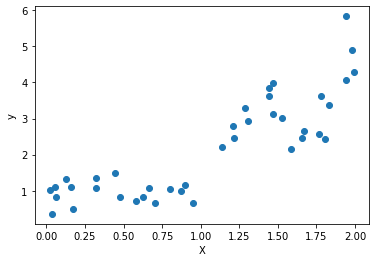

In [2]:
# your code goes here...
with open('observed_data.p', 'rb') as f:
    X, y, sigma = pickle.load(f).values()

print(f'{X.shape=}')
print(f'{y.shape=}')
print(f'{sigma=}')

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 2) Linear regression with the normal equation

#### Choosing a feature function
You first need to define a feature function $\phi: X \to \mathbb{R}$ that maps the observed data to the feature space. 
Note that this is an initial design choice your have to make. You need to decide on a set of features, and how many of them you use.

For example, you could decide to use polynomial features up to degree K, i.e., you use [$x, x^2, \ldots, x^K$], for some $K \in \mathbb{N}$. 
But you could use any other set of features, e.g., Fourier features, step functions, Gaussians... 

Once you have settled on a feature function, you can apply it to your observed data. Your feature function together with the weight applied to every feature define your model of the observed target variables:

$$
f(x) = \phi_X{\top}w
$$

Following the normal equation you derived in exercise 2(a), complete the following tasks: 

##### Tasks
- Calculate the MLE of the weights.
- Obtain the MLE prediction of the underlying function by applying calculated weights to the features.
- Plot the resulting function on top the observed data.
- Does the function fit the data well? Play around with the type and the number of features to fit the data well.

In [3]:
def polynomial_features(X, k=3):
    arrays = [X**i for i in range(1,k+1)]
    return np.c_[tuple(arrays)]

def exponential_features(X, k=3):
    arrays = [lam * np.exp(lam * X) for lam in range(1,k+1)]
    return np.c_[tuple(arrays)]

Phi = polynomial_features(X)
print('Poly')
print(f'shape: {X.shape} -> {Phi.shape}')
print(f'first sample: {X[0]} -> {Phi[0]}')

Phi_exp = exponential_features(X)
print('\nExp')
print(f'shape: {X.shape} -> {Phi_exp.shape}')
print(f'first sample: {X[0]} -> {Phi_exp[0]}')

Poly
shape: (40, 1) -> (40, 3)
first sample: [0.02202202] -> [2.20220220e-02 4.84969454e-04 1.06800080e-05]

Exp
shape: (40, 1) -> (40, 3)
first sample: [0.02202202] -> [1.0222663  2.09005676 3.20489188]


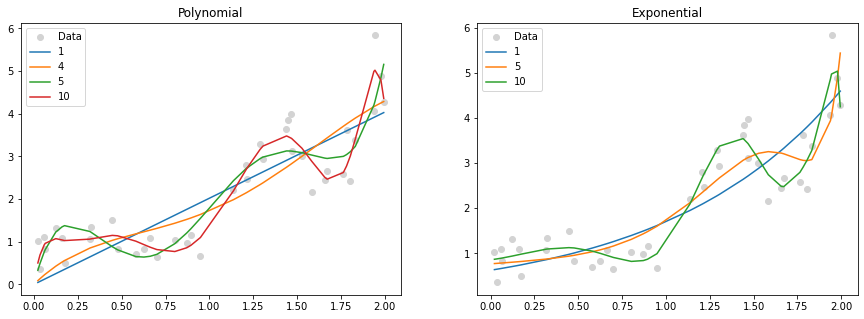

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(X, y, color='lightgray')
axs[1].scatter(X, y, color='lightgray')

ks = [1,4,5,10]
for k in ks:
    Phi = polynomial_features(X, k=k)

    MLE_w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    f = Phi @ MLE_w

    axs[0].plot(X, f)
    

axs[0].legend(['Data'] + ks)
axs[0].set_title('Polynomial')
    
ks = [1,5,10]
for k in ks:
    Phi = exponential_features(X, k=k)

    MLE_w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    f = Phi @ MLE_w

    axs[1].plot(X, f)
    

axs[1].legend(['Data'] + ks)
axs[1].set_title('Exponential')
    
plt.show()

We tried polynomial and expontential Features, both with different amounts of features.
The polynomial features, fit the Data very well with $k\geq5$ features. 
The exponential, did so with $k\geq6$ features.


### 3) Gaussian linear regression

Next, we take the probabilistic view perform inference over the weights of our candidate function (instead of making a maximum likelihood point estimate). We use the same prior setting as in the exercise sheet: zero mean Gaussian prior with unit covariance matrix. 

Using the equations presented in the lecture, and derived by you in the exercise sheet (exercise 1), perform the following tasks:

#### 3.1) Visualize the prior over functions

Tasks:

- Define the prior mean and covariance in `numpy`.
- Define the implied prior over your candidate functions as a `numpy` Gaussian distribution (imported above). As data you could use your observed data, but for better visualization we recommend using just a uniformly spaced 1D grid of `x`, e.g., `x = np.linspace(-1, 1, 1000)`.
- Draw samples from the prior over function and visualize them in `(x, f(x))` space. 
- Plot the marginal *standard deviation* of the prior over functions on top (hint: the marginal variance is given by the diagonal elements of the covariance matrix). 

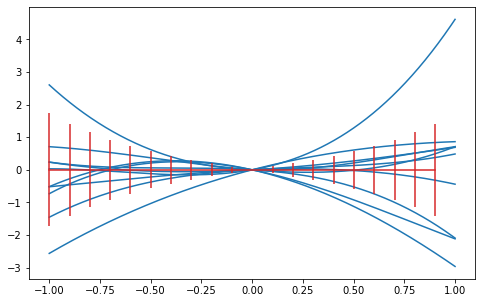

In [48]:
# Number of features
k=3
num_samples = 10

prior_mu = np.zeros(k)
prior_cov = np.identity(k)
x = np.linspace(-1, 1, 1000)
Phi = polynomial_features(x, k=k)
fx = multivariate_normal(Phi @ prior_mu, Phi@prior_cov@Phi.T, size=num_samples)
marginal_std = np.sqrt((Phi@prior_cov@Phi.T).diagonal())

fig, ax = plt.subplots(1,1, figsize=(8,5))
for i in range(num_samples):
    ax.plot(x, fx[i,:], color='tab:blue')
    

ax.errorbar(x[::50], (Phi @ prior_mu)[::50], yerr=marginal_std[::50], xerr=None, color='tab:red')  # plot error bar only for every 50th point
plt.show()

#### 3.2) Obtain the posterior over $w$ and over functions $f$

The posterior over $w$ and the implied posterior over $f$ are both given in closed form and are Gaussian. Use the formulas from the lecture and/or your exercises to calculate and to visualize them, by completing the following tasks. Note that this posterior should be with respect to your observed data `X`. 

Tasks:
- Construct the posterior over $w$ using equations from lecture, e.g., obtain the mean $\mu_w$ and covariance $\Sigma_w$.
- Construct the posterior on f by obtaining the mean $\mu_f$ and the covariance $\Sigma_f$.


In [6]:
k = 5 # k=1 for Phi=X
Phi = polynomial_features(X, k=k)

# no samples
n = Phi.shape[0]
# dimension (= number of features)
d = Phi.shape[1]

lh_cov = sigma**2 * np.identity(n)

gram = np.linalg.inv(Phi @ Phi.T + lh_cov)

w_post_mu = (Phi.T @ gram @ y).reshape(-1)
w_post_cov = np.identity(d) - (Phi.T @ gram @ Phi)

f_post_mu = (Phi @ w_post_mu).reshape(-1)
f_post_cov = Phi @ w_post_cov @ Phi.T

#### 3.3) Generate and plot posterior samples for $w$ and $f$
- Sample functions from the posterior over $f$, and visualize them together with your observed data `(X, y)`. 
- Add the posterior mean $\mu_f$ and the marginal standard deviation to the plot.

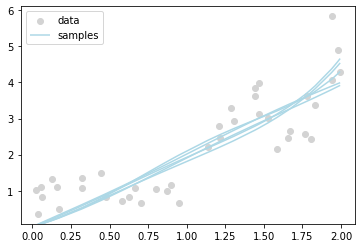

In [7]:
samples = multivariate_normal(f_post_mu, f_post_cov, size=5)
fig, ax = plt.subplots()
ax.scatter(X, y, color='lightgrey')

lines = matplotlib.collections.LineCollection([list(zip(X,line)) for line in samples], color='lightblue')
ax.add_collection(lines)

std = np.sqrt(np.diag(f_post_cov))

#ax.plot(X, f_post_mu, color='red')
#ax.plot(X, f_post_mu + std, color='red', linestyle='--', alpha=.5)
#ax.plot(X, f_post_mu - std, color='red', linestyle='--', alpha=.5)
ax.legend(['data', 'samples','mean', 'std'])
plt.show()

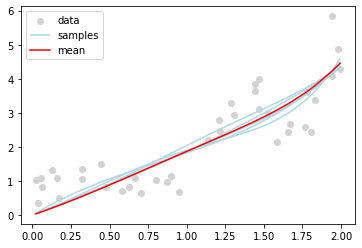

In [8]:
samples = multivariate_normal(f_post_mu, f_post_cov, size=5)
fig, ax = plt.subplots()
ax.scatter(X, y, color='lightgrey')

lines = matplotlib.collections.LineCollection([list(zip(X,line)) for line in samples], color='lightblue')
ax.add_collection(lines)

std = np.sqrt(np.diag(f_post_cov))

ax.plot(X, f_post_mu, color='red')
#ax.plot(X, f_post_mu + std, color='red', linestyle='--', alpha=.5)
#ax.plot(X, f_post_mu - std, color='red', linestyle='--', alpha=.5)
ax.legend(['data', 'samples','mean', 'std'])
plt.show()

##### Add the marginal standard deviation of the posterior to the plot

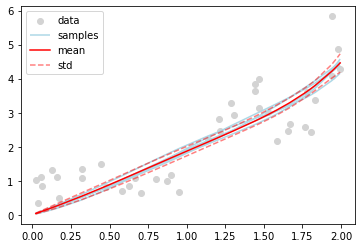

In [9]:
samples = multivariate_normal(f_post_mu, f_post_cov, size=5)
fig, ax = plt.subplots()
ax.scatter(X, y, color='lightgrey')

lines = matplotlib.collections.LineCollection([list(zip(X,line)) for line in samples], color='lightblue')
ax.add_collection(lines)

std = np.sqrt(np.diag(f_post_cov))

ax.plot(X, f_post_mu, color='red')
ax.plot(X, f_post_mu + std, color='red', linestyle='--', alpha=.5)
ax.plot(X, f_post_mu - std, color='red', linestyle='--', alpha=.5)
ax.legend(['data', 'samples','mean', 'std'])
plt.show()

#### 3.4) How do the inferred functions look like outside the data region? 

Functions sampled from the posterior should fit the data well, but how do they look like outside the ranges of the observed data?

To visualize this you need to evaluate the functions sampled from the posterior w.r.t to `X` over a new range of test values, e.g., from a 1D grid `x = np.linspace(-2, 3, 1000)` (hint: you need to sample the posterior over $w$). 

Tasks:
- generate a 1D grid of test observations for visualization
- plot the functions corresponding the samples from the posterior w.r.t to the observed data `X` (see hint above)
- How do you interpret the result? Is the behaviour of the inferred functions outside the data ranges reasonable?

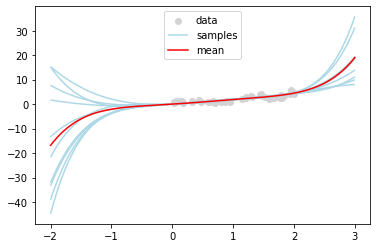

In [10]:
x = np.linspace(-2, 3, 1000)
Phi_x = polynomial_features(x, k=k)
samples = multivariate_normal(w_post_mu, w_post_cov, size=10)

fig, ax = plt.subplots()
ax.scatter(X, y, color='lightgrey')

lines = matplotlib.collections.LineCollection([list(zip(x, Phi_x @ w)) for w in samples], color='lightblue')
ax.add_collection(lines)
ax.plot(x, Phi_x @ w_post_mu, color='red')
ax.legend(['data', 'samples','mean', 'std'], loc='upper center')
ax.plot()
plt.show()

The behaviour of a single sampled function isn't really reasonable, as it will predict really high or low numbers without any foundation.  
The distribution of functions, however seems very reasonable, as there is a high variance (= low confidence), where there is little or no data.

### 3) Comparison

In exercise `(2)` of the exercise sheet you studied the correspondence between the choice of prior and the kind of regularization in linear regression. Let's check this in practice: How do the MLE and probabilistic solution compare to each other? What are the conceptual differences? Which fit do you think is better, and why? 

- Show visually that the posterior mean coincides with the l2-regularized least-squares estimator (ridge regression point estimate).
- How would you have to change the prior in order to implicitly regularize the weights with a LASSO regularization?


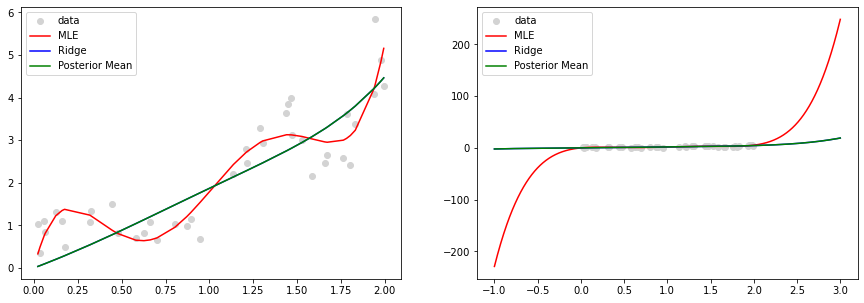

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

Phi = polynomial_features(X, k=5)


MLE_w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
Ridge_w = np.linalg.inv(Phi.T @ Phi + sigma**2 * np.eye(5)) @ Phi.T @ y

ax[0].scatter(X, y, color='lightgrey')
ax[0].plot(X, Phi @ MLE_w, color='red')
ax[0].plot(X, Phi @ Ridge_w, color='blue')
ax[0].plot(X, Phi @ w_post_mu, color='green')
ax[0].legend(['data', 'MLE', 'Ridge', 'Posterior Mean'])

x = np.linspace(-1, 3, 1000)
Phi_x = polynomial_features(x, k=5)
ax[1].scatter(X, y, color='lightgrey')
ax[1].plot(x, Phi_x @ MLE_w, color='red')
ax[1].plot(x, Phi_x @ Ridge_w, color='blue')
ax[1].plot(x, Phi_x @ w_post_mu, color='green')
ax[1].legend(['data','MLE', 'Ridge', 'Posterior Mean'])
plt.show()

**Answer**:
We can see that the posterior mean is identical to the ridge regression solution. 

We can easily see on the example of polynomial feature functions with degree $k=5$, that the MLE is much more accurate on the train data, and at the same time has a much more complicated function than the Ridge/MAP (see left plot).
However, the MLE predicts much more extreme values outside of the training data regime (right), which may be a sign of overfitting. Inside the training regime, we would prefer the fit of the MLE.

For LASSO regularization, we would need a Laplacian prior with mean 0 (see exercise 2d).

